<a href="https://colab.research.google.com/github/eren-darici/ECON6190/blob/main/Project_PartA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Add ggplot, dplyr, and stargazer
# Install if missing, then load
packages <- c("ggplot2", "dplyr", "stargazer")

for (pkg in packages) {
  if (!require(pkg, character.only = TRUE)) {
    install.packages(pkg, dependencies = TRUE)
    library(pkg, character.only = TRUE)
  }
}


# Part 1

In [5]:
# Read data1.csv
DATA_URL <- "https://raw.githubusercontent.com/eren-darici/ECON6190/refs/heads/main/data/data1.csv"
data1 <- read.csv(DATA_URL)

### Part 1.i.
Make sure R can read it correctly and report descriptive statistics (including variance) of
the two variables in the dataset using R. Provide a scatter plot of the variables using R.

In [6]:
# Make sure R can read it correctly
if (!is.null(data1)) {
  print("data1.csv loaded correctly.")
} else {
  stop("ERROR: data1.csv was not loaded correctly.")
}

[1] "data1.csv loaded correctly."


In [7]:
# Print descriptive stats including variance
vary <- var(data1$y)
varx <- var(data1$x)
variance_row <- data.frame(x=varx, y=vary)
rownames(variance_row) <- "Variance"

# Turn summary data into data.frame
data1_desc_stats <- do.call(cbind, lapply(data1, summary))

# Append variance row
data1_desc_stats <- rbind(data1_desc_stats, variance_row)

print(data1_desc_stats)

# Use stargazer to print latex
# stargazer(data1_desc_stats, summary=FALSE, rownames = FALSE)

                  y           x
Min.     -2.3456977 -1.26098524
1st Qu.  -0.8331459 -0.36196242
Median   -0.5466319 -0.06723632
Mean     -0.3372970  0.11629241
3rd Qu.   0.3532770  0.77952623
Max.      1.0844412  1.60934721
Variance  0.8169811  0.75326834


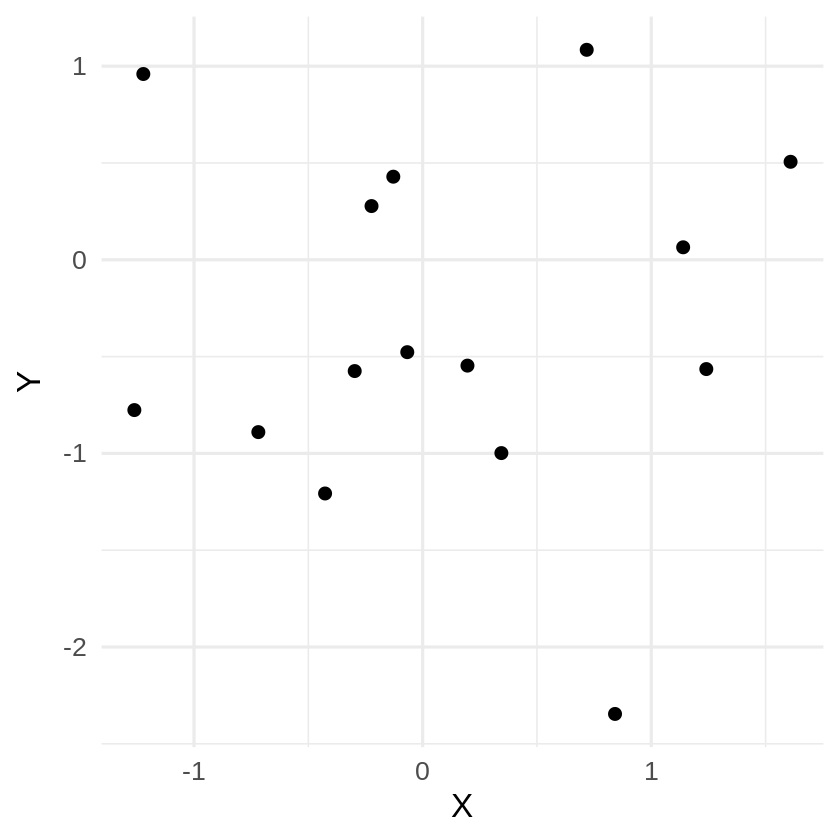

In [8]:
# Create a scatterplot
ggplot(data1, aes(x = x, y = y)) +
  geom_point() +
  labs(
    x = "X",
    y = "Y"
  ) +
  theme_minimal(base_size=20)

### Part 1.ii.
Run a simple two-sided t-test to check for the equality of the means of the y and the x
variables in the data. Use 5% and 1% levels of significance. Comment on the results -
whether you reject the null of equal mean or not at 5% level, report test statistic, p-value
for the test and 95% confidence interval. How does it differ from the 99% CI? Use R and
report the output.

In [9]:
# 2-sided t-test at 5% percent (assuming variances are not equal)
t_test <- t.test(data1$x, data1$y,
                alternative = "two.sided",
                conf.level = .95,
                var.equal = FALSE)
t_test


	Welch Two Sample t-test

data:  data1$x and data1$y
t = 1.4019, df = 27.954, p-value = 0.1719
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2092178  1.1163965
sample estimates:
 mean of x  mean of y 
 0.1162924 -0.3372970 


In [10]:
# 2-sided t-test at 1% percent (assuming variances are not equal)
t_test <- t.test(data1$x, data1$y,
                alternative = "two.sided",
                conf.level = .99,
                var.equal = FALSE)
t_test


	Welch Two Sample t-test

data:  data1$x and data1$y
t = 1.4019, df = 27.954, p-value = 0.1719
alternative hypothesis: true difference in means is not equal to 0
99 percent confidence interval:
 -0.4405651  1.3477438
sample estimates:
 mean of x  mean of y 
 0.1162924 -0.3372970 


# Part 2
Use seed as the last 4 digits of your student ID number for both (i) and (ii) below.

In [11]:
# Set seed
SEED <- 8900
set.seed(SEED)

### Part 2.i.
Generate 10 random numbers from continuous Uniform distribution with range [0,1]
and plot the histogram. Compare this to the histogram based on 1000 random
numbers generated from the same uniform distribution. Report the sample mean and
plot of histogram in each case.

In [12]:
# Generate 10 random numbers
data.part2i_10 <- runif(10, min=0, max=1)

# Generate 1000 random numbers
data.part2i_1000 <- runif(10, min=0, max=1)

In [13]:
# Bind data
df.part2i <- bind_rows(
  data.frame(value=data.part2i_10, size='10 samples'),
  data.frame(value=data.part2i_1000, size='1000 samples')
)


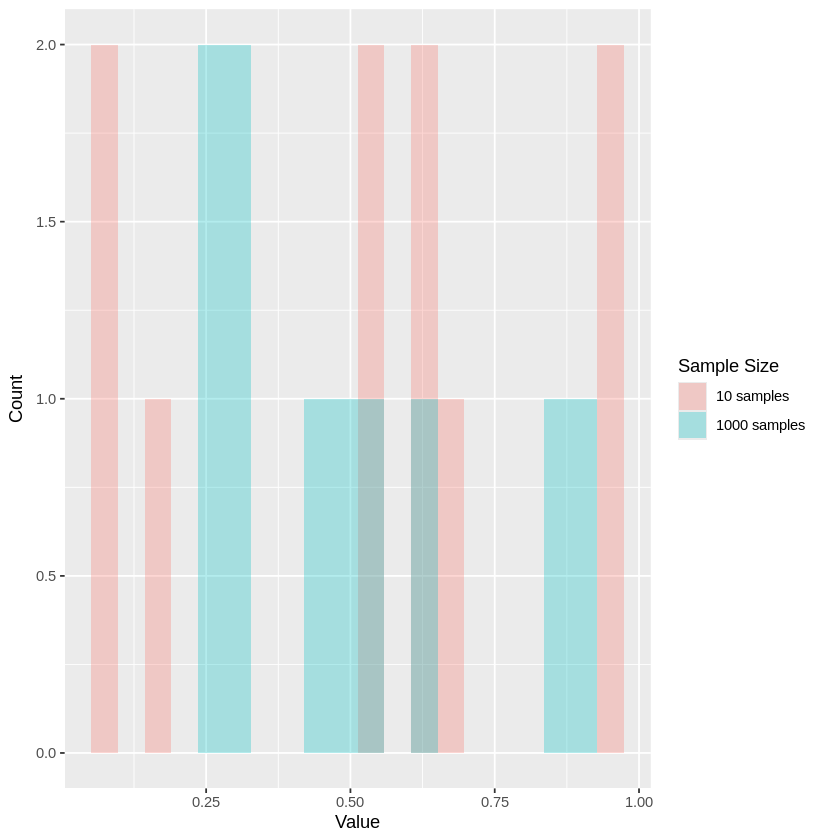

In [14]:
# Create the histogram
ggplot(df.part2i, aes(x = value, fill = size)) +
  geom_histogram(bins=20, alpha=0.3, position='identity') +
  labs(
  x='Value',
  y='Count',
  fill="Sample Size"
  )

In [15]:
# Sample means
sample_mean_2_10 <- mean(data.part2i_10)
sample_mean_2_1000 <- mean(data.part2i_1000)
print(sample_mean_2_10)
print(sample_mean_2_1000)

[1] 0.5253337
[1] 0.4976522


### Part 2.ii.
Generate 25 random numbers from a standard normal distribution and plot a
histogram. Now repeat the process and generate 250 random numbers from the same
distribution and plot the histogram. Plot kernel density for these 250 random numbers
with (approx.) optimal bandwidth. Increase and decrease the bandwidth sufficiently
to illustrate (with a short comment) how the plots changes with bandwidth (make
sure to present all plots from R in your output.

In [16]:
# Generate standard normal samples
data.part2ii_25 <- rnorm(mean=0, sd=1, n=25)
data.part2ii_250 <- rnorm(mean=0, sd=1, n=250)

In [17]:
# Bind data
df.part2ii <- bind_rows(
  data.frame(value=data.part2ii_25, size='25 samples'),
  data.frame(value=data.part2ii_250, size='250 samples')
)

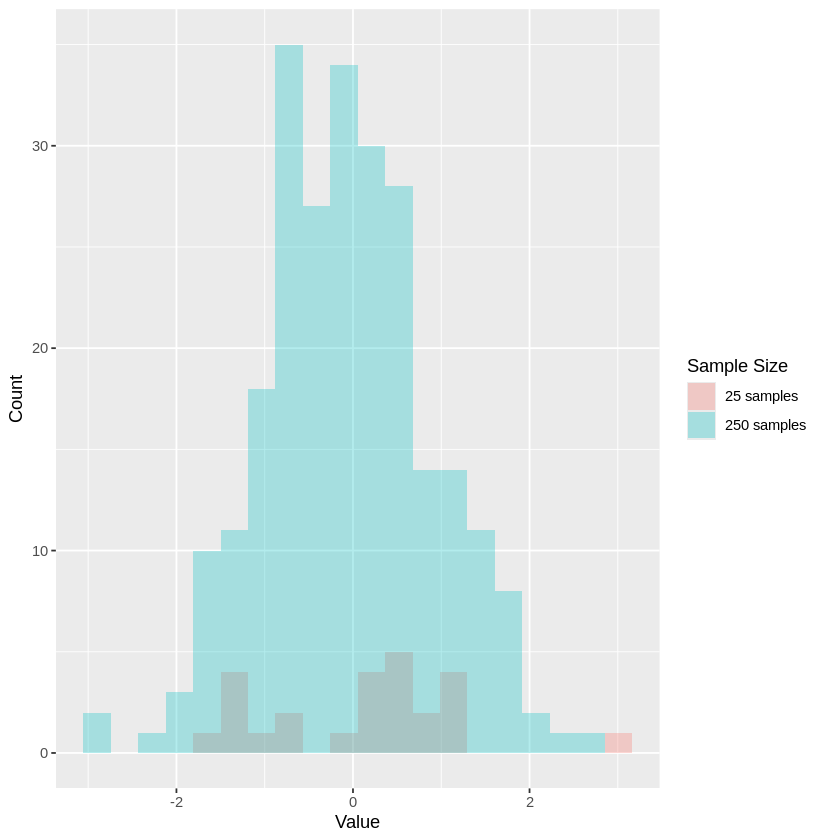

In [18]:
# Create histogram
ggplot(df.part2ii, aes(x=value, fill=size)) +
  geom_histogram(bins=20, alpha=0.3, position ='identity') +
  labs(
  x='Value',
  y='Count',
  fill="Sample Size"
  )

In [19]:
# Silverman's Rule of Thumb of optimal bandwidth
silverman_bw <- function(x) {
  n <- length(x)
  s <- sd(x)
  iqr <- IQR(x)
  0.9 * min(s, iqr / 1.34) * n^(-1/5)
}

# Find the optimal bandwith
h_opt.250 <- silverman_bw(data.part2ii_250)
print(h_opt.250)


[1] 0.2789754


In [20]:
# Bandwidths to compare
bandwidths <- c(0.000001, h_opt.250, 0.5, 1)

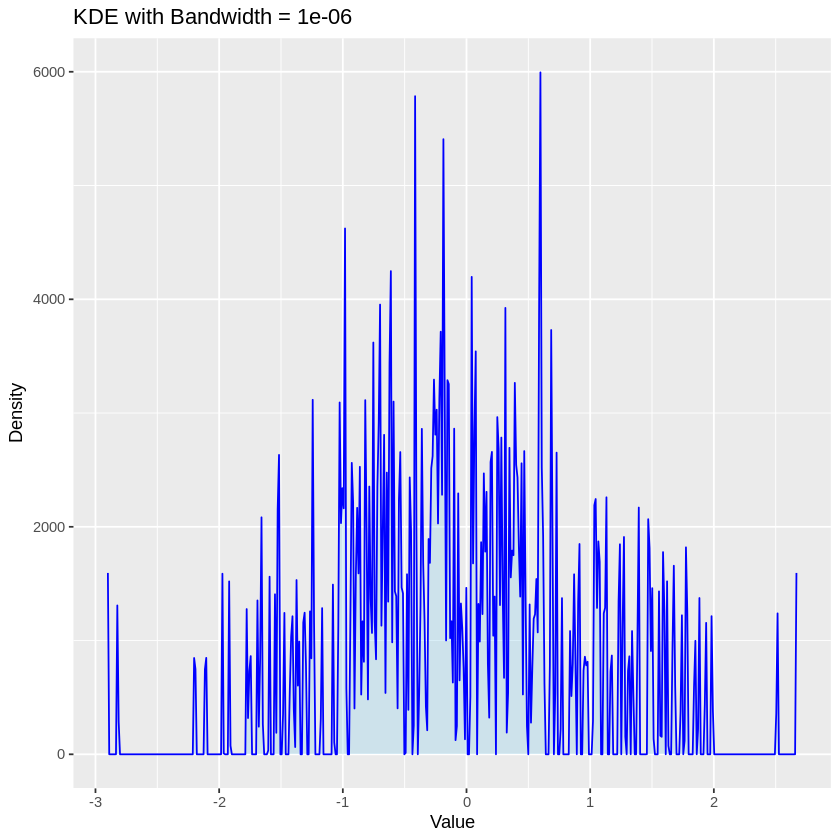

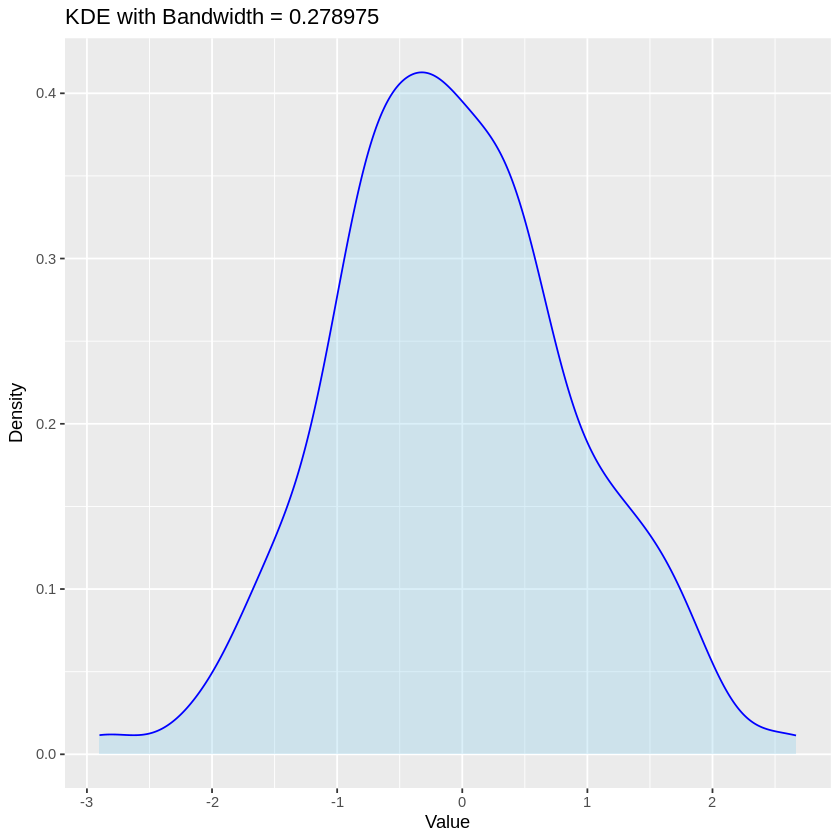

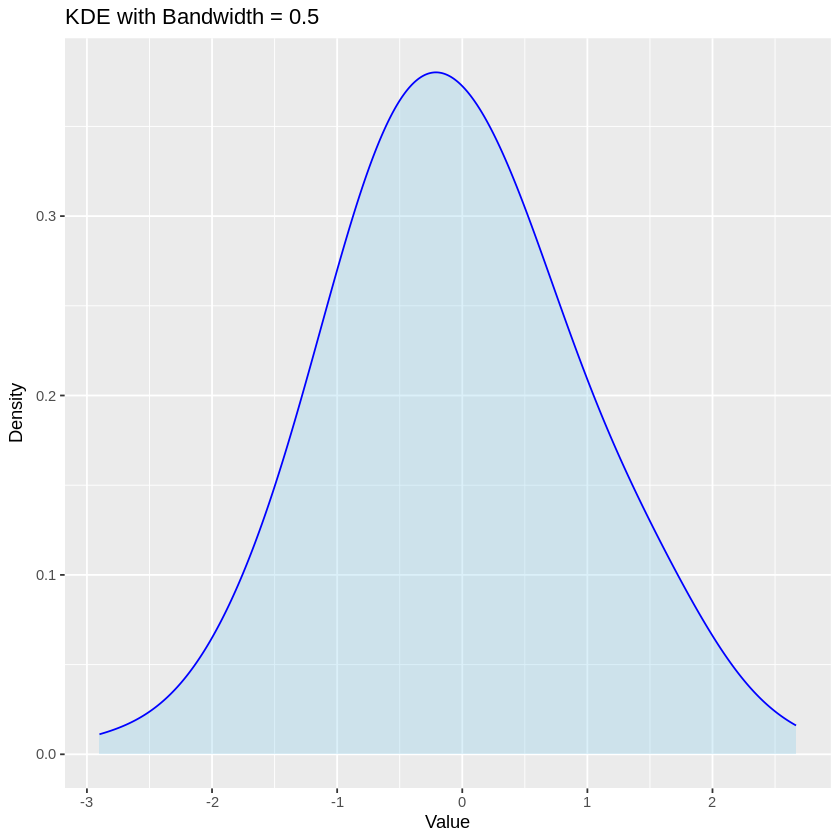

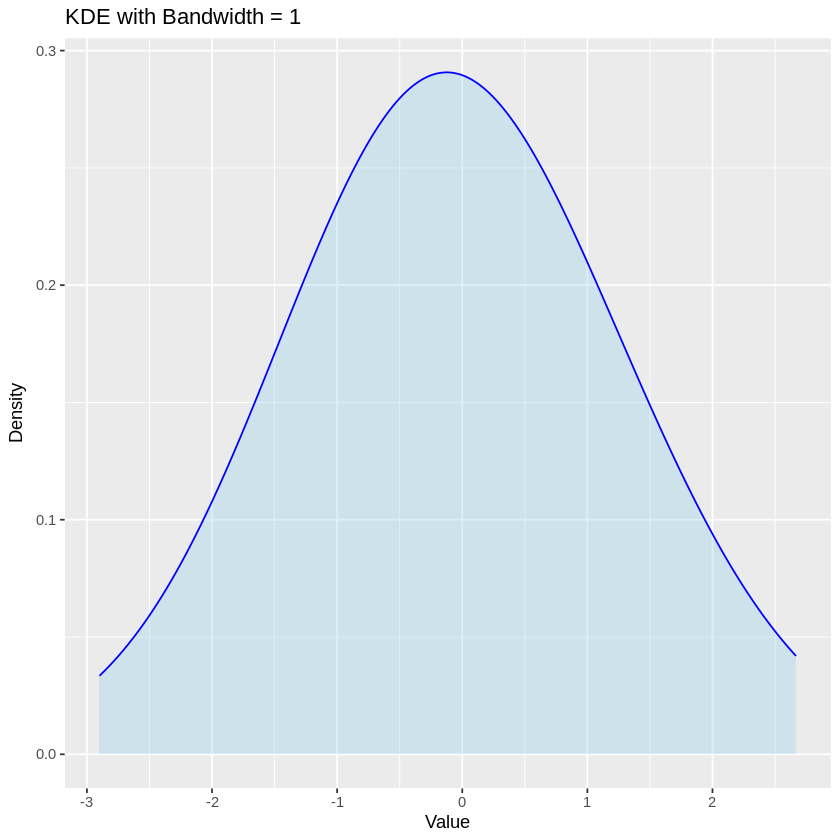

In [21]:
# Loop over bandwidths
for (bw in bandwidths) {
  print(
    ggplot(data.frame(x=data.part2ii_250), aes(x=x)) +
      geom_density(color='blue', fill='skyblue', alpha=0.3, bw = bw) +
      labs(
        title = paste("KDE with Bandwidth =", round(bw, 6)),
        x = "Value",
        y = "Density"
      )
  )
}


# Part 3
Use the last 4 digits of your student ID as seed value.

### Part 3.i.
Generate any 5 numbers. Now resample with replacements from these 3 times. Make
each resample size the same as the original sample size. Use R and report the original
and the resampled values.

In [22]:
# Create 5 numbers between 1 and 100
original <- sample(1:100, 5)
original

[1] 58  6 81 59 61

In [23]:
# Print original
print(paste("Original:", paste(original, collapse = " ")))

# Resample 3 time with replacement and print
for (i in 1:3) {
  x <- sample(original, size=length(original), replace=TRUE)
  print(paste("Resample", i, ":", paste(x, collapse = " ")))
}

[1] "Original: 58 6 81 59 61"
[1] "Resample 1 : 61 59 59 59 59"
[1] "Resample 2 : 81 81 81 59 61"
[1] "Resample 3 : 6 6 59 58 58"
